# Make HDF5 data cube

Convert nfiles x nrows x ncols into a hdf5 data cube.

In [9]:
import h5py
import numpy as np
from glob import glob
import pandas as pd

In [14]:
test_file = "../../../Data/sim_data/z2.45/spec_xHeII1_015_mt_line0000.dat"
data = np.loadtxt(test_file)
file_list = glob("../../../Data/sim_data/z2.45/spec_xHeII1_015_mt_line*.dat")

Read in the sim data for z=2.45 and store it in an HDF5 table

In [6]:
# Create archive
f = h5py.File('../../../Data/z245.hdf5', 'w')

n_cols = data.shape[1]
n_rows = data.shape[0]
n_files = len(file_list)

# Create a "dataset" which is like a numpy.ndarray
z245 = f.create_dataset('z2.45', dtype=np.float64, 
                           shape=(n_files, n_rows, n_cols)) #, compression="lzf")

# Fill it with data like you would do for a numpy.ndarray
# TODO: loop over redshift folders too...
for i,fname in enumerate(file_list):
    z245[i, :, :] = pd.read_table(fname, header=None, comment='#', delimiter=' ')
    
# Save associated metadata: 
names = ["velocity [km/s]", "tau_HILya", "tau_HeI584", "tau_HeIILya", 
         "nHI [cm^-3]", "nHeII [cm^-3]", "Delta_b", "T [K]", "xpos [Mpc/h]", "vpec [km/sec]"]
z245.attrs['colname'] = names
    
f.close()

# Make a function to do this for any redshift folder:

In [28]:
def convert_to_hdf5(z):
    """ convert simulation data to hdf5. 
    
        input: z, a string of format 'z2.45'
        
        returns NONE 
        
        
    
    """
    file_list = glob("../../../Data/sim_data/"+z+"/spec*line*.dat")
    test_file = file_list[0]
    data = np.loadtxt(test_file)
    
    
    #take out the dot '.'
    stringz = z[:2]+z[3:]
    
    # Create archive
    f = h5py.File("../../../Data/"+stringz+".hdf5", 'w')

    n_cols = data.shape[1]
    n_rows = data.shape[0]
    n_files = len(file_list)
    


    # Create a "dataset" which is like a numpy.ndarray
    z245 = f.create_dataset(z, dtype=np.float64, 
                               shape=(n_files, n_rows, n_cols)) #, compression="lzf")

    # Fill it with data like you would do for a numpy.ndarray
    # TODO: loop over redshift folders too...
    for i,fname in enumerate(file_list):
        z245[i, :, :] = pd.read_table(fname, header=None, comment='#', delimiter=' ')

    # Save associated metadata: 
    names = ["velocity [km/s]", "tau_HILya", "tau_HeI584", "tau_HeIILya", 
             "nHI [cm^-3]", "nHeII [cm^-3]", "Delta_b", "T [K]", "xpos [Mpc/h]", "vpec [km/sec]"]
    z245.attrs['colname'] = names

    f.close()
    
    return None

Convert other redshifts folders into hdf5:

In [29]:
convert_to_hdf5("z2.55")
convert_to_hdf5("z2.65")
convert_to_hdf5("z2.75")
convert_to_hdf5("z2.85")

Example:

read in the HDF5 file and access the data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Open the file stream
f = h5py.File('test.hdf5', 'r')

In [6]:
# f['z2.45'][1, 1, 0] = file, row, col
dv = f['z2.45'][1, 1, 0] - f['z2.45'][1, 0, 0]
v = np.arange(n_rows*n_files)*dv
nHI = f['z2.45'][...,4].flatten()
tau_HILya = f['z2.45'][...,1].flatten()

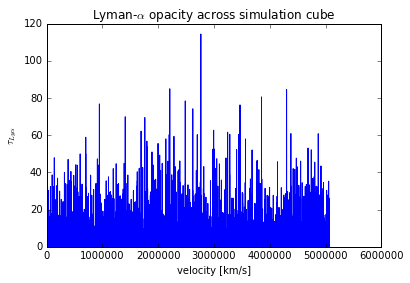

In [8]:
plt.plot(v, tau_HILya)
plt.title(r"Lyman-$\alpha$ opacity across simulation cube")
plt.xlabel("velocity [km/s]")
plt.ylabel(r"$\tau_{Ly\alpha}$")
plt.show()